# 1.0 Basic Image Operation

In [ ]:
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt
#from google.colab import drive
#drive.mount('/content/drive')

## 1.1 Combining Two Images

#### a. Read

Image shape:  (670, 1132, 3)


(-0.5, 1131.5, 669.5, -0.5)

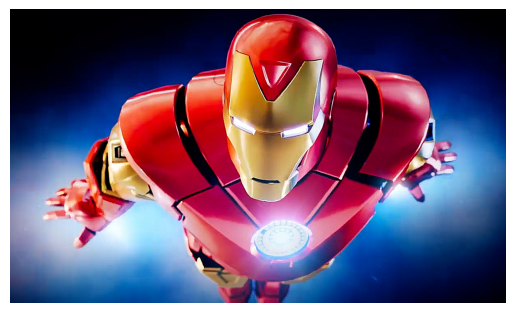

In [ ]:
im1 = Image.open('IronMan1.jpg')
im2 = Image.open('IronMan2.jpg')

im1 = np.array(im1)
print("Image shape: ", im1.shape)
#print("Value type: %s, Min: %d, Max: %d" % (type(im1[0,0,0]), np.min(im1), np.max(im1))) 

plt.imshow(im1)
plt.axis(False)

Image shape:  (1080, 1920, 3)


(-0.5, 1919.5, 1079.5, -0.5)

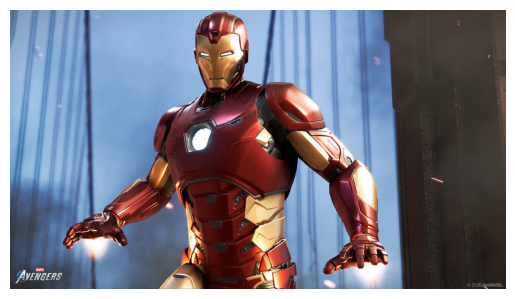

In [ ]:
im2 = np.array(im2)
print("Image shape: ", im2.shape)

plt.imshow(im2)
plt.axis(False)

#### b. Resize

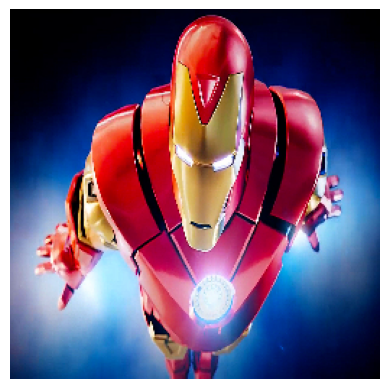

In [ ]:
im1_256 = cv2.resize(im1, (256, 256))
plt.imshow(im1_256); plt.axis(False);

New shape:  (256, 256, 3)


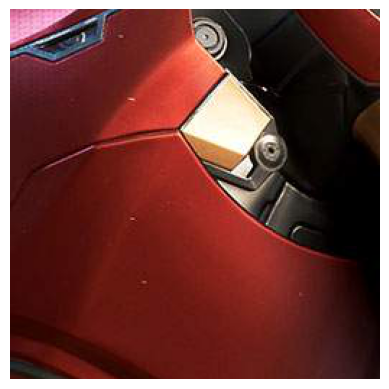

In [ ]:
im2_crop = im2[412:668, 832:1088, :]
print("New shape: ", im2_crop.shape)
plt.imshow(im2_crop); plt.axis(False);

#### c. create image C

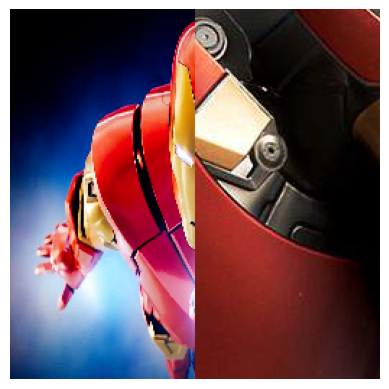

In [ ]:
im3_cat = np.concatenate((im1_256[:,0:128,:], im2_crop[:,128:256,:]), axis = 1)

plt.imshow(im3_cat); plt.axis(False);

#### d. create image D

Image shape:  (256, 256, 3)
Value type: <class 'numpy.float64'>, Min: 0, Max: 255


(-0.5, 255.5, 255.5, -0.5)

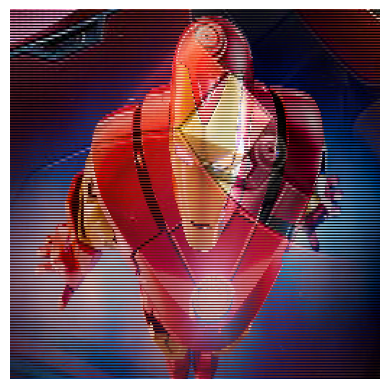

In [ ]:
im_size = 256 
im4 = np.zeros((im_size, im_size, 3)) 

for i in range(0, im_size):
  if i % 2 == 1:
    im4[i,:,:] = im1_256[i,:,:]
  if i % 2 == 0:
    im4[i,:,:] = im2_crop[i,:,:]

im4_float = im4/255.0
print("Image shape: ", im4.shape)
print("Value type: %s, Min: %d, Max: %d" % (type(im4[0,0,0]), np.min(im4), np.max(im4))) 
plt.imshow(im4_float); plt.axis(False)

#### e. without a loop

Image shape:  (128, 256, 3)
Image shape:  (128, 256, 3)
Image shape:  (256, 256, 3)


(-0.5, 255.5, 255.5, -0.5)

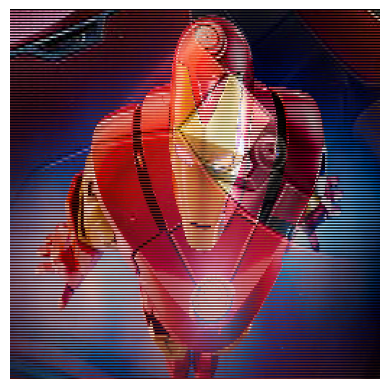

In [ ]:
im5_1 = im1_256[0:255:2,:,:]
im5_2 = im2_crop[1:256:2,:,:]

print("Image shape: ", im5_1.shape)
print("Image shape: ", im5_2.shape)

im5 = np.stack((im5_1,im5_2), axis = 1 )
im5 = np.reshape(im5,(256,256,3))

print("Image shape: ", im5.shape)

# plt.imshow(im5_1); plt.axis(False);
# plt.imshow(im5_2); plt.axis(False);
plt.imshow(im5); plt.axis(False)


## 1.2 Coloar Spaces

#### a. binary image

Image shape:  (384, 512, 3)


(-0.5, 511.5, 383.5, -0.5)

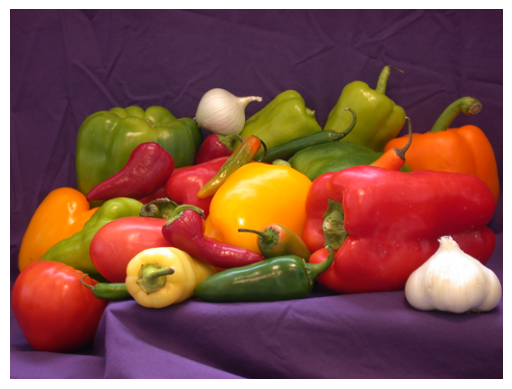

In [ ]:
im_p = Image.open('peppers_BlueHills.png')
im_p = np.array(im_p)

print("Image shape: ", im_p.shape)


plt.imshow(im_p)
plt.axis(False)

(-0.5, 511.5, 383.5, -0.5)

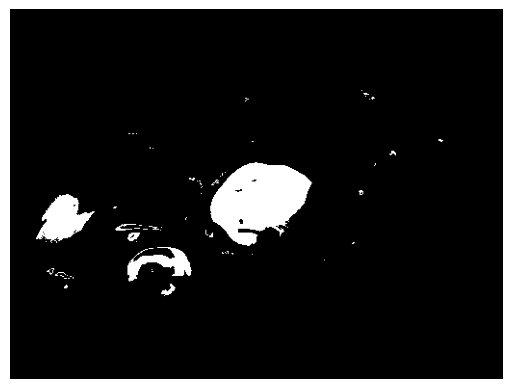

In [ ]:
im_binary = np.zeros((im_p.shape)) 

for i in range(0, 384):
  for j in range(0,512):
    if (im_p[i,j,0] >= 230) and (im_p[i,j,1] >= 130) and (0 <= im_p[i,j,2] <=150 ):
      im_binary[i,j,:] = 255

plt.imshow(im_binary)
plt.axis(False)


#### b. HSV image

Value type: <class 'numpy.uint8'>, Min: 0, Max: 255
Image shape:  (384, 512, 3)
Image shape:  (384, 512, 3)
Value type: <class 'numpy.uint8'>, Min: 0, Max: 255


(-0.5, 511.5, 383.5, -0.5)

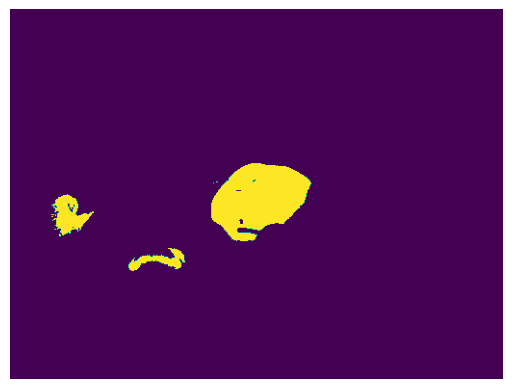

In [ ]:
from google.colab.patches import cv2_imshow
im_p = cv2.imread('peppers_BlueHills.png')
#im_p = Image.open('peppers_BlueHills.png')
#im_p = np.array(im_p)

print("Value type: %s, Min: %d, Max: %d" % (type(im_p[0,0,0]), np.min(im_p), np.max(im_p))) 

im_hsv = cv2.cvtColor(im_p, cv2.COLOR_BGR2HSV)

lower = np.array([16, 100, 255])
upper = np.array([26, 255, 255])
mask = cv2.inRange(im_hsv, lower, upper)
res = cv2.bitwise_and(im_p, im_p, mask= mask)

#yellow_ratio =(cv2.countNonZero(mask_yellow))/(image.size/3)

print("Image shape: ", im_hsv.shape)
print("Image shape: ", res.shape)
print("Value type: %s, Min: %d, Max: %d" % (type(mask[0,0]), np.min(im_p), np.max(im_p))) 

#cv2.imshow(mask)
plt.imshow(mask)
plt.axis(False)

#### c. Comparison

In [ ]:
# See report

# 2.0 2D Geometric Transforms

## 2.1 transformation function

#### 1. Translation

In [ ]:
def translation_matrix(dx, dy):
    return np.array([
        [1, 0, dx],
        [0, 1, dy],
        [0, 0, 1]
    ])

#### 2. Rotation

In [ ]:
import math

def rotation_matrix(angle):
    cos_theta = math.cos(angle)
    sin_theta = math.sin(angle)
    return np.array([
        [cos_theta, -sin_theta, 0],
        [sin_theta, cos_theta, 0],
        [0, 0, 1]
    ])

#### 3. Similarity

In [ ]:
import math

def similarity_matrix(angle, dx, dy, scale):
    cos_theta = math.cos(angle)
    sin_theta = math.sin(angle)
    return np.array([
        [scale*cos_theta, -scale*sin_theta, dx],
        [scale*sin_theta, scale*cos_theta, dy],
        [0, 0, 1]
    ])

#### 4. Affine

In [ ]:
def affine_matrix(a, b, c, d, e, f):
    return np.array([
        [a, b, c],
        [d, e, f],
        [0, 0, 1]
    ])

## 2.2 Wrap an image

In [ ]:
def imwrap(I,T):
  h, w = I.shape[0], I.shape[1]
  cx, cy = h/2, w/2
  xv, yv = np.meshgrid(np.arange(0,h), np.arange(0,w))
  xv = xv - cx
  yv = yv - cy 
  for i in range(h):
    for j in range(w):
      coords = np.array([xv[i,j], yv[i,j], 1])
      transformed_coords = np.dot(T, coords.T)

      xv[i,j] = transformed_coords[1]
      yv[i,j] = transformed_coords[0]

  xv = xv + cx
  yv = yv + cy

  for u in range(h):
    for v in range(w):
      if int(xv[u,v]) < 0 or int(xv[u,v]) > (h -1) or int(yv[u,v]) < 0 or int(yv[u,v]) > (w -1):
        continue
      image2[u,v] = I[int(xv[u,v]), int(yv[u,v])]

  return image2


def bilinear_interpolation(x, y, image):
  img = np.array(image)
  x1, x2 = math.floor(x), math.ceil(x)
  y1, y2 = math.floor(y), amth.ceil(y)
  for i in range(0,3):
    result[x,y,i] = (img[x1,y1,i] * (x2 - x) * (y2 - y) + 
                     img[x2,y2,i] * (x - x1) * (y2 - y) +
                     img[x1,y2,i] * (x2 - x) * (y - y1) +
                     img[x2,y2,i] * (x - x1) * (y - y1))
  return result


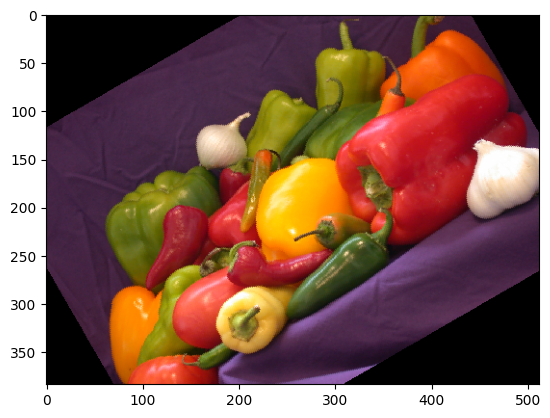

In [ ]:
im_p = Image.open('peppers_BlueHills.png')
im_p = np.array(im_p)

angle = math.pi/6
cos_theta = math.cos(angle)
sin_theta = math.sin(angle)
T = np.array([[cos_theta, -sin_theta, 0],
              [sin_theta, cos_theta, 0],
              [0, 0, 1]])

I = im_p
h, w = I.shape[0], I.shape[1]
cx, cy = w//2, h//2
xv, yv = np.meshgrid(np.arange(0,w), np.arange(0,h))
xv = xv - cx
yv = yv - cy

for i in range(h):
  for j in range(w):
    coords = np.array([xv[i,j], yv[i,j], 1])
    transformed_coords = np.dot(T, coords.T)

    xv[i,j] = transformed_coords[1]
    yv[i,j] = transformed_coords[0]

xv = xv + cx - 64
yv = yv + cy + 64

image2 = np.zeros_like(I)

for u in range(h):
  for v in range(w):
    if int(xv[u,v]) < 0 or int(xv[u,v]) > (h -1) or int(yv[u,v]) < 0 or int(yv[u,v]) > (w -1):
      continue
    image2[u,v] = I[int(xv[u,v]), int(yv[u,v])]

plt.imshow(image2)


In [ ]:
im_p = Image.open('peppers_BlueHills.png')
im_p = np.array(im_p)

T = rotation_matrix(0)

print(T)

im_rotate = imwrap(im_p, T)

plt.imshow(im_rotate)
plt.axis(False)


In [ ]:
print(im_p.shape)
print(xv)

(384, 512, 3)
[[  1   1   1 ...   0   0   0]
 [  2   2   2 ...   1   1   1]
 [  3   3   3 ...   2   2   2]
 ...
 [381 381 381 ... 380 380 380]
 [382 382 382 ... 381 381 381]
 [383 383 383 ... 382 382 382]]


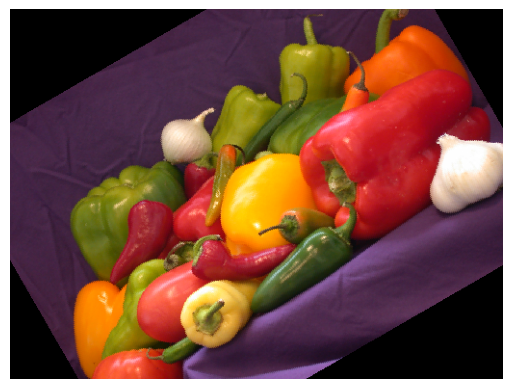

In [ ]:
im_p = Image.open('peppers_BlueHills.png')

im_rotate = im_p.rotate(30)

plt.imshow(im_rotate)
plt.axis(False)

im_rotate.save('im_rotate.jpeg')

## 2.3 Demonstrate transformation

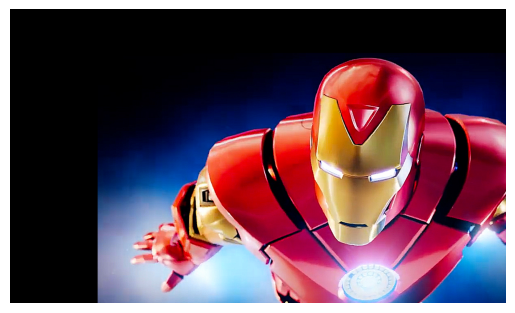

In [ ]:
img = Image.open('IronMan1.jpg')

img = np.array(img)

rows, cols = img.shape[:2]

M = np.float32([[1, 0, 200], [0, 1,100]])

dst = cv2.warpAffine(img, M, (cols, rows))

plt.imshow(dst)
plt.axis(False)

im = Image.fromarray(dst)
im.save('img_translate1.jpg')

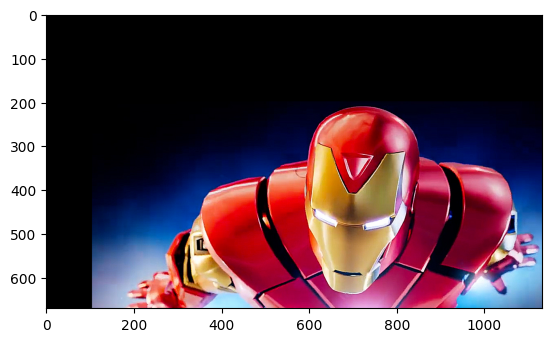

In [ ]:
im_p = Image.open('IronMan1.jpg')
im_p = np.array(im_p)

T = translation_matrix(-100, -200)
I = im_p
h, w = I.shape[0], I.shape[1]
cx, cy = w//2, h//2
xv, yv = np.meshgrid(np.arange(0,w), np.arange(0,h))

xv = xv - cx
yv = yv - cy

for i in range(h):
  for j in range(w):
    coords = np.array([xv[i,j], yv[i,j], 1])
    transformed_coords = np.dot(T, coords.T)

    xv[i,j] = transformed_coords[1]
    yv[i,j] = transformed_coords[0]

xv = xv + cx - 230
yv = yv + cy + 226

image2 = np.zeros_like(I)

for u in range(h):
  for v in range(w):
    if int(xv[u,v]) < 0 or int(xv[u,v]) > (h -1) or int(yv[u,v]) < 0 or int(yv[u,v]) > (w -1):
      continue
    image2[u,v] = I[int(xv[u,v]), int(yv[u,v])]

plt.imshow(image2)

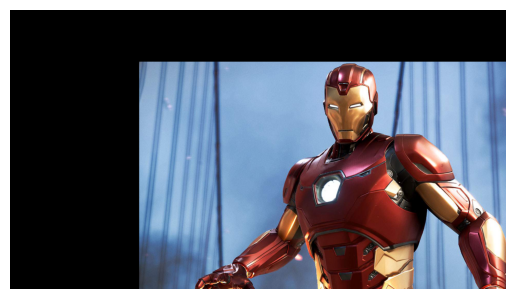

In [ ]:
img = Image.open('IronMan2.jpg')
img = np.array(img)

rows, cols = img.shape[:2]

M = np.float32([[1, 0, 500], [0, 1, 200]])

dst = cv2.warpAffine(img, M, (cols, rows))

plt.imshow(dst)
plt.axis(False)

im = Image.fromarray(dst)
im.save('img_translate2.jpg')

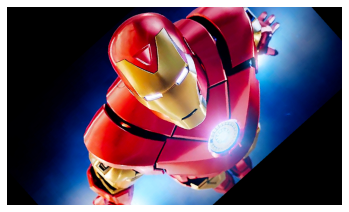

In [ ]:
img = Image.open('IronMan1.jpg')

im_rotate = img.rotate(42)

plt.imshow(im_rotate)
plt.axis(False)

# im = Image.fromarray(im_rotate)
im_rotate.save('im_rotate1.jpg')


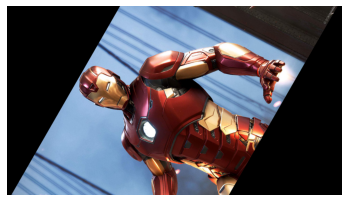

In [ ]:
img = Image.open('IronMan2.jpg')

im_rotate = img.rotate(60)

plt.imshow(im_rotate)
plt.axis(False)

# im = Image.fromarray(im_rotate)
im_rotate.save('im_rotate2.jpg')

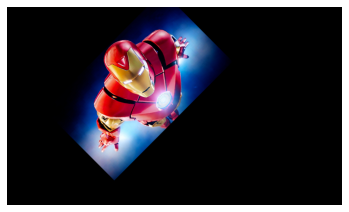

In [ ]:
img = Image.open('IronMan1.jpg')

img = np.array(img)

rows,cols = img.shape[:2]

M = cv2.getRotationMatrix2D((cols / 3, rows / 2), 45, 0.5)

dst = cv2.warpAffine(img, M, (cols, rows))

plt.imshow(dst)
plt.axis(False)

im = Image.fromarray(dst)
im.save('img_Similarity1.jpg')

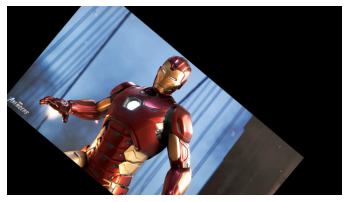

In [ ]:
img = Image.open('IronMan2.jpg')

img = np.array(img)

rows,cols = img.shape[:2]

M = cv2.getRotationMatrix2D((cols / 3, rows / 2), -40, 0.8)

dst = cv2.warpAffine(img, M, (cols, rows))

plt.imshow(dst)
plt.axis(False)

im = Image.fromarray(dst)
im.save('img_Similarity2.jpg')

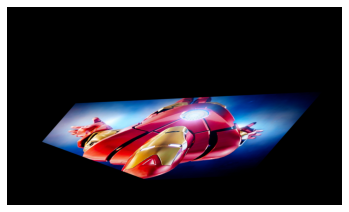

In [ ]:
src = Image.open('IronMan1.jpg')

src = np.array(src)

srcTri = np.array( [[0, 0], [src.shape[1] - 1, 0], [0, src.shape[0] - 1]] ).astype(np.float32)
dstTri = np.array( [[0, src.shape[1]*0.80], [src.shape[1]*0.85, src.shape[0]*0.75], [src.shape[1]*0.15, src.shape[0]*0.7]] ).astype(np.float32)

warp_mat = cv2.getAffineTransform(srcTri, dstTri)

warp_dst = cv2.warpAffine(src, warp_mat, (src.shape[1], src.shape[0]))

center = (warp_dst.shape[1]//2, warp_dst.shape[0]//2)
angle = -20
scale = 0.8

rot_mat = cv2.getRotationMatrix2D( center, angle, scale )
warp_rotate_dst = cv2.warpAffine(warp_dst, rot_mat, (warp_dst.shape[1], warp_dst.shape[0]))

plt.imshow(warp_rotate_dst)
plt.axis(False)

im = Image.fromarray(warp_rotate_dst)
im.save('img_Affine1.jpg')

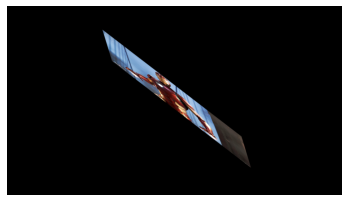

In [ ]:
src = Image.open('IronMan2.jpg')

src = np.array(src)

srcTri = np.array( [[0, 0], [src.shape[1] - 1, 0], [0, src.shape[0] - 1]] ).astype(np.float32)
dstTri = np.array( [[0, src.shape[1]*0.33], [src.shape[1]*0.85, src.shape[0]*0.25], [src.shape[1]*0.15, src.shape[0]*0.7]] ).astype(np.float32)

warp_mat = cv2.getAffineTransform(srcTri, dstTri)

warp_dst = cv2.warpAffine(src, warp_mat, (src.shape[1], src.shape[0]))

center = (warp_dst.shape[1]//2, warp_dst.shape[0]//2)
angle = -50
scale = 0.6

rot_mat = cv2.getRotationMatrix2D( center, angle, scale )
warp_rotate_dst = cv2.warpAffine(warp_dst, rot_mat, (warp_dst.shape[1], warp_dst.shape[0]))

plt.imshow(warp_rotate_dst)
plt.axis(False)

im = Image.fromarray(warp_rotate_dst)
im.save('img_Affine2.jpg')

# 3.0 Cameras

## 3.1 Camera Matrix Computation

In [ ]:
def intrinsic(fx,fy,cx,cy):
  intrin = np.array([[fx,0,cx,0],[0,fy,cy,0],[0,0,1,0],])
  return intrin

K = intrinsic(100, 100, 25, 25)
print("Intrinsic matrix K:", K)

E = np.array([[1,0,0,1],[0,0,-1,0],[0,1,0,2],[0,0,0,1]])
print('Extrinsic matrix E:', E)

P = np.dot(K,E)
print("projection matrix P:", P)

Intrinsic matrix K: [[100   0  25   0]
 [  0 100  25   0]
 [  0   0   1   0]]
Extrinsic matrix E: [[ 1  0  0  1]
 [ 0  0 -1  0]
 [ 0  1  0  2]
 [ 0  0  0  1]]
projection matrix P: [[ 100   25    0  150]
 [   0   25 -100   50]
 [   0    1    0    2]]


## 3.2 Field of view and focal length

In [ ]:
# See report

# 4.0 Relighting

#### a. load images

Image shape:  (3024, 4032, 3)


(-0.5, 4031.5, 3023.5, -0.5)

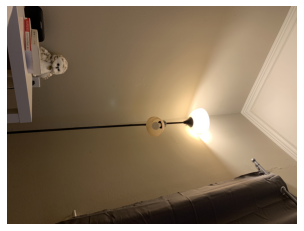

In [ ]:
imagel1 = Image.open('image l1.jpeg')
imagel1 = np.array(imagel1)
print("Image shape: ", imagel1.shape)
#print("Value type: %s, Min: %d, Max: %d" % (type(im1[0,0,0]), np.min(im1), np.max(im1))) 

plt.imshow(imagel1)
plt.axis(False)

Image shape:  (3024, 4032, 3)


(-0.5, 4031.5, 3023.5, -0.5)

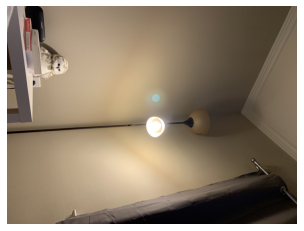

In [ ]:
imagel2 = Image.open('image l2.jpeg')
imagel2 = np.array(imagel2)
print("Image shape: ", imagel2.shape)
#print("Value type: %s, Min: %d, Max: %d" % (type(im1[0,0,0]), np.min(im1), np.max(im1))) 

plt.imshow(imagel2)
plt.axis(False)

Image shape:  (3024, 4032, 3)


(-0.5, 4031.5, 3023.5, -0.5)

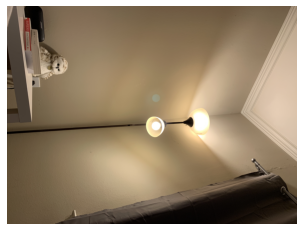

In [ ]:
imagel12 = Image.open('image l12.jpeg')
imagel12 = np.array(imagel12)
print("Image shape: ", imagel12.shape)
#print("Value type: %s, Min: %d, Max: %d" % (type(im1[0,0,0]), np.min(im1), np.max(im1))) 

plt.imshow(imagel12)
plt.axis(False)

### b,c. synthetic photo & D

(-0.5, 4031.5, 3023.5, -0.5)

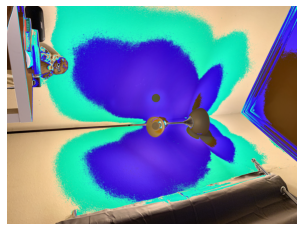

In [ ]:
l12_synth = imagel1 + imagel2
l12_synth = (l12_synth-np.min(l12_synth))/(np.max(l12_synth)-np.min(l12_synth))

plt.imshow(l12_synth)
plt.axis(False)

im = Image.fromarray(l12_synth)
im.save('l12_synth.jpeg')

Image shape:  (3024, 4032, 3)
Value type: <class 'numpy.float64'>, Min: 0, Max: 1


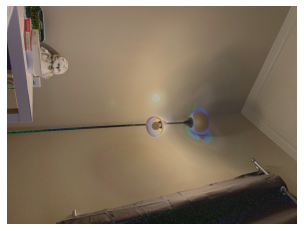

In [ ]:
D = l12_synth - imagel12 

D = (D-np.min(D))/(np.max(D)-np.min(D))

plt.imshow(D)
plt.axis(False)

print("Image shape: ", D.shape)
print("Value type: %s, Min: %d, Max: %d" % (type(D[0,0,0]), np.min(D), np.max(D)))


In [ ]:
im = Image.fromarray((D * 255).astype(np.uint8))
im.save('D.jpeg')

In [ ]:
print("Image shape: ", D.shape) #Prints out shape: (height, width, channels)
print("Value type: %s, Min: %d, Max: %d" % (type(D[0,0,0]), np.min(D), np.max(D))) # Image is loaded with uint8 values in [0, 255]

D_float = D/255.0 # Converts values to float values in [0,1]
print("Value type: %s, Min: %d, Max: %d" % (type(D_float[0,0,0]), np.min(D_float), np.max(D_float)))


Image shape:  (3024, 4032, 3)
Value type: <class 'numpy.float64'>, Min: 0, Max: 1
Value type: <class 'numpy.float64'>, Min: 0, Max: 0


### d. comparison

In [ ]:
# See report